In [2]:
import keras
from keras import layers, regularizers

In [3]:
learning_rate = 1e-4
dropout_rate = 0.7
validation_rate = 0.3


In [50]:
# 알렉스넷을 2클래스(dog, cat)로 수정
vggnet = keras.Sequential()

vggnet.add(layers.Input(shape=(224, 224, 3)))

for n_filters in [64, 128, 256]:
    for _ in range(2):
        vggnet.add(layers.Conv2D(filters=n_filters, kernel_size=3, padding='same', activation='relu'))
    vggnet.add(layers.MaxPooling2D(pool_size=2))

for n_filters in [512, 512]:
    for _ in range(4):
        vggnet.add(layers.Conv2D(filters=n_filters, kernel_size=3, padding='same', activation='relu'))
    vggnet.add(layers.MaxPooling2D(pool_size=2))

vggnet.add(layers.Flatten())
vggnet.add(layers.Dense(4096, activation='relu'))
vggnet.add(layers.Dense(4096, activation='relu'))
vggnet.add(layers.Dense(1000, activation='softmax'))

vggnet.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,487,080 (543.55 MB)

 Trainable params: 142,487,080 (543.55 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
data_path = '../data/dogs-vs-cats'

In [9]:
import keras

In [51]:
import keras
vggnet_keras = keras.applications.VGG16()

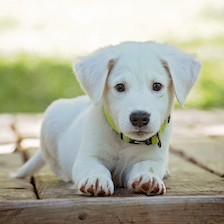

In [52]:
from PIL import Image

dog_png = Image.open(data_path + '/images/dog.png')
display(dog_png)

In [53]:
import numpy as np

dog_array = np.array(dog_png)
dog_array.shape

(224, 224, 3)

In [54]:
from keras.applications import vgg16

vgg_prep_dog = vgg16.preprocess_input(dog_array)
vgg_prep_dog.shape

(224, 224, 3)

In [55]:
predictions = vggnet_keras.predict(vgg_prep_dog[np.newaxis, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [56]:
max_index = np.argmax(predictions[0])

In [57]:
print(max_index, predictions[0][max_index])

208 0.3569813


In [58]:
import requests

url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
json_data = requests.get(url).json()

json_data[str(max_index)]

['n02099712', 'Labrador_retriever']

In [59]:
from keras.applications import vgg16

vgg16.decode_predictions(predictions)

[[('n02099712', 'Labrador_retriever', 0.3569813),
  ('n02099601', 'golden_retriever', 0.14486554),
  ('n02104029', 'kuvasz', 0.09278727),
  ('n02111500', 'Great_Pyrenees', 0.06916993),
  ('n02106166', 'Border_collie', 0.056728758)]]

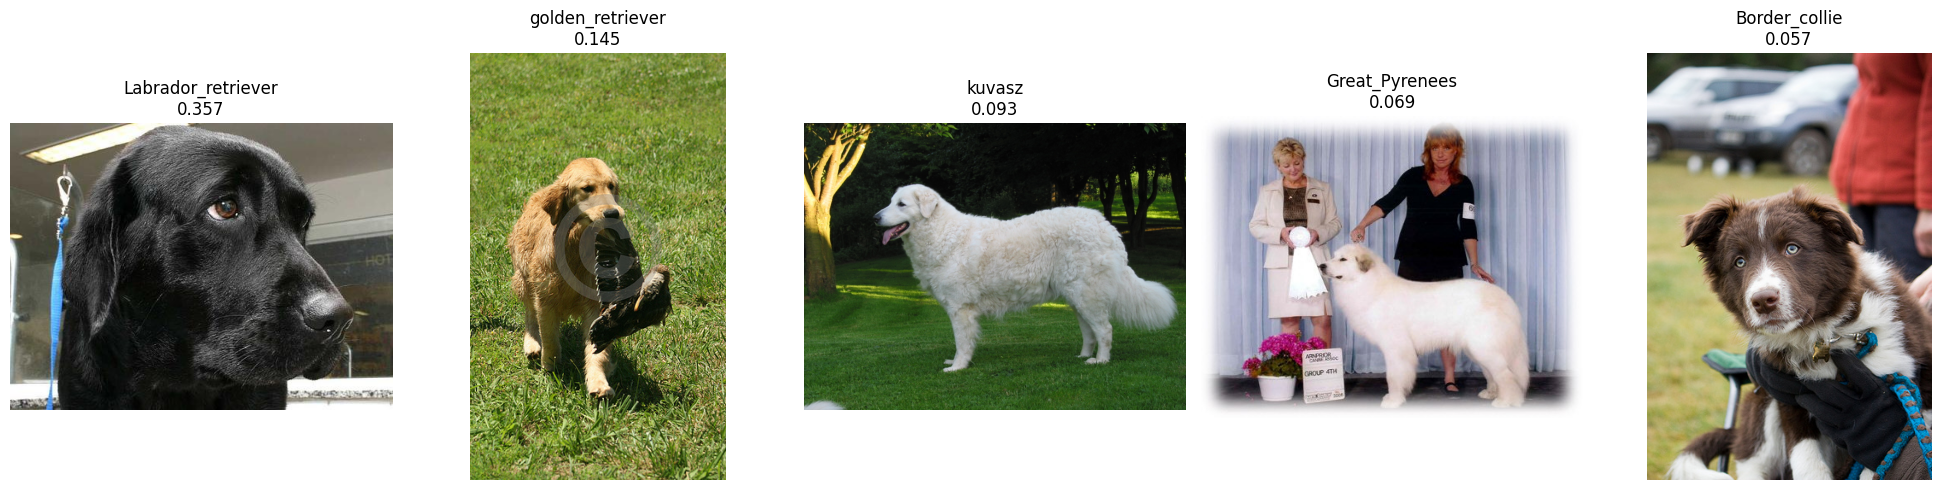

In [49]:
imagenet_cats = [("n02099712_Labrador_retriever.jpeg", "Labrador_retriever", "0.3569813"), 
  ("n02099601_golden_retriever.jpeg", "golden_retriever", "0.14486554"), 
  ("n02104029_kuvasz.jpeg", "kuvasz", "0.09278727"),
  ("n02111500_Great_Pyrenees.jpeg", "Great_Pyrenees", "0.06916993"), 
  ("n02106166_Border_collie.jpeg", "Border_collie", "0.056728758")
]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(imagenet_cats), figsize=(20, 5))
for ax, (img_file, name, score) in zip(axes, imagenet_cats):
    cat_png = Image.open(data_path + '/imagenette/' + img_file)
    ax.imshow(cat_png)
    ax.axis('off')
    ax.set_title(f"{name}\n{float(score):.3f}", fontsize=12)
plt.tight_layout()
plt.show()


In [34]:
from keras.applications import vgg16

vgg16.decode_predictions(predictions, top=1)   

[[('n02099712', 'Labrador_retriever', 0.3569813)]]

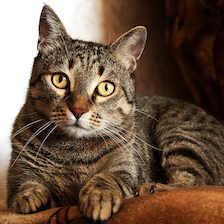

(224, 224, 3)

In [42]:
cat_png = Image.open(data_path + '/images/cat.png')
display(cat_png)

vgg_prep_cat = vgg16.preprocess_input(np.array(cat_png))
vgg_prep_cat.shape

In [43]:
predictions = vggnet_keras.predict(vgg_prep_cat[np.newaxis, :])
vgg16.decode_predictions(predictions)   


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[[('n02123045', 'tabby', 0.43275315),
  ('n02124075', 'Egyptian_cat', 0.31128004),
  ('n02123159', 'tiger_cat', 0.2160649),
  ('n02971356', 'carton', 0.0035795665),
  ('n03223299', 'doormat', 0.0031308273)]]

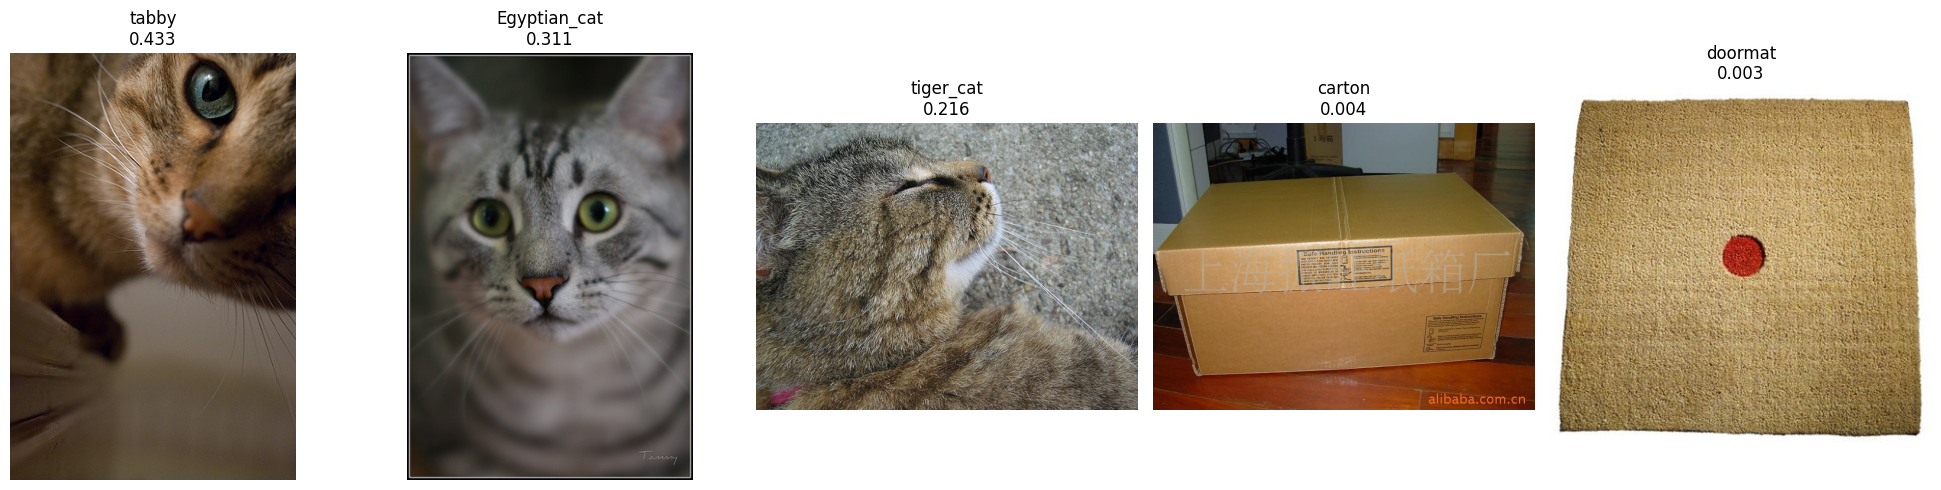

In [48]:
imagenet_cats = [("n02123045_tabby.JPEG", "tabby", "0.43275315"), 
  ("n02124075_Egyptian_cat.jpeg", "Egyptian_cat", "0.31128004"), 
  ("n02123159_tiger_cat.jpeg", "tiger_cat", "0.2160649"),
  ("n02971356_carton.jpeg", "carton", "0.0035795665"), 
  ("n03223299_doormat.jpeg", "doormat", "0.0031308273")
]
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(imagenet_cats), figsize=(20, 5))
for ax, (img_file, name, score) in zip(axes, imagenet_cats):
    cat_png = Image.open(data_path + '/imagenette/' + img_file)
    ax.imshow(cat_png)
    ax.axis('off')
    ax.set_title(f"{name}\n{float(score):.3f}", fontsize=12)
plt.tight_layout()
plt.show()
